O Método de Newton-Raphson tem por objetivo encontrar um valor aproximado para a raiz de uma função. Estimando um ponto de coordenadas $(x_0, y_0)$ que coincide com uma determinada função, é possível calcular uma reta tangente a essa função.</br>
A equação fundamental da reta tangente é $y-y_0 = m(x-x_0)$, sendo $m$ o coeficiente angular da reta tangente, ou seja, a sua derivada. Portanto, dada uma função $f(x)$, é necessário derivar a função $f'(x_0)$, para obter $m = f'(x_0)$.</br>
Substituindo na equação $y-y_0 = m(x-x_0)$, tem-se</br>
$$ y-y_0 = f'(x_0)(x-x_0). $$
A reta tangente toca o eixo x em um outro ponto, fazendo uma nova aproximação. Desta forma, é possível traçar uma nova reta tangente e aplicar novamente a equação da reta, recursivamente, até encontrar a melhor aproximação. O critério de parada desse método pode ser definido como o número de iterações que apresentem a melhor aproximação, ou seja, a menor distância entre um ponto estimado e a raiz da função.</br>
Quando $$ |x_n-x_{n-1}| \leq erro $$
Da equação $y-y_0 = f'(x_0)(x-x_0)$, o ponto que toca o eixo $x$ tem valor $0$ para $y$, e $y_0$ corresponde a $f(x_0)$, então, fazendo a substituição, têm-se </br>
$$ 0 - f(x_0) = f'(x_0)(x-x_0).$$
Passando a derivada da função para antes da igualdade, é obtida a divisão
$$-\frac{f(x_0)}{f'(x_0)} = (x-x_0).$$
Logo,
$$ x = x_0 - \frac{f(x_0)}{f'(x_0)}. $$
Aplicando sucessivamente a equação, pode-se generalizar
$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}. $$

In [1]:
# Importação das bibliotecas

import math
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
%matplotlib inline
from sympy.plotting import *

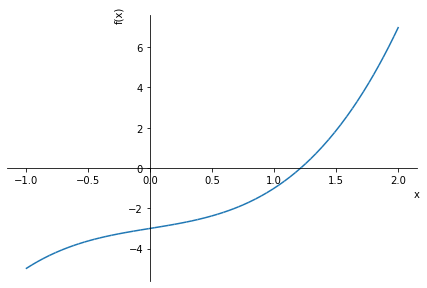

In [2]:
# Definir uma função e a derivada dessa função

def f(x):
    return x**3+x-3
def f_linha(x):
    return 3*x**2+1

# Gerar o gráfico da função

x = Symbol('x')
plot(f(x), (x, -1, 2))

In [3]:
# Estimar um ponto x (chute inicial) que define o intervalo entre x e x0 da função contínua

x0 = 5
lista_xi = [] # armazena todos os valores xi iterados

# Função que aplica o Método de Newton de acordo com o número de iterações definido

def metodo_newton(x0, iteracoes): # define a função com dois argumentos
    iteracao = 0 # ponto de partida
    while iteracao <= iteracoes: # condição para rodar as iterações com o critério de parada
        x1 = x0 - (f(x0) / f_linha(x0)) # Método de Newton
        x0 = x1 # Variável temporária para hospedar o valor de x1 a cada iteração
        iteracao += 1 # Adiciona um passo de iteração a cada rodada até o critério de parada
        lista_xi.append(x1)
        print(x1)
    print('Quantidade de iterações:', iteracao)
    print('A raíz aproximada é:', x1)

metodo_newton(x0, 10)

3.3289473684210527
2.2420953383443445
1.5883358570306219
1.2854325269427802
1.2167067824032813
1.213418940032903
1.213411662797817
1.2134116627622296
1.2134116627622296
1.2134116627622296
1.2134116627622296
Quantidade de iterações: 11
A raíz aproximada é: 1.2134116627622296


##### Observações:
Foi constatado que até a 7ª iteração o resultado foi variando, e a partir da 8ª iteração foi obtida a raiz 1,2134116627622296 que manteve seu valor constante, sendo essa a melhor aproximação.

##### Questão 1:

a) Determine a raiz da função:

Ponto inicial: 5

Quantidade de iterações: 10

raiz aproximada da função: 1,21
   
b) Vantagens do Método de Newton em relação ao Método da Bissecção:

O Método de Newton apresenta convergência mais rápida quando comparada com o Método da Bissecção, pois consiste em aplicar a tangente em um ponto da função para encontrar um ponto no eixo x que se aproxima da raiz. Desta forma, não há a necessidade de estimar o intervalo e fazer divisões em subintervalos até encontrar a raiz da função. Também não precisa aplicar o Teorema de Bolzano para identificar se no intervalo proposto a raiz existe.

Porém, apresenta como desvantagem a necessidade de calcular a derivada de uma função, e calcular seu valor numérico a cada iteração, o que pode não ser trivial a depender do tipo de função.
Além disso, pode falhar se a derivada da função for nula, pois a reta tangente não interceptará o eixo x, ocorrendo uma indeterminação matemática (divisão por 0).

c) Apresente uma interpretação geométrica do método de Newton.

A partir de um ponto x estimado, é possível obter um par de coordenadas que determina a equação da reta tangente a esse ponto, traçado em laranja. Essa reta intersecciona o eixo x, determinando outro ponto para calcular novamente a tangente até se aproximar da raiz da função em azul.

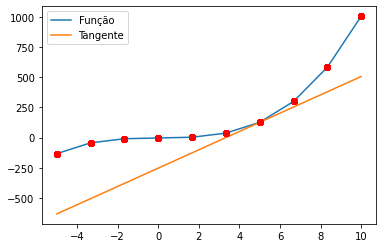

In [4]:
# Exibe o gráfico da função e da tangente

def tang(x):
    return f(x0)+f_linha(x0)*(x-x0)
X = np.linspace(-5, 10, 10) # define o intervalo no gráfico
plt.plot(X, f(X), label='Função')
plt.plot(X, tang (X), label='Tangente')
plt.legend()

# Exibe os pontos no gráfico correspondentes aos xi da lista de pontos

for xi in lista_xi:
    plt.plot(X, f(X), 'ro')